In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lm, LogisticRegression as glm,Lasso, Ridge, LassoCV, RidgeCV

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [9]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

In [12]:
from sklearn.datasets import load_files

In [26]:
reviews_train = load_files(
    "aclImdb/train",
    categories=["pos", "neg"],
)

In [27]:
text_train,y_train=reviews_train.data,reviews_train.target

In [16]:
reviews_test=load_files('aclImdb/test')

In [19]:
text_test,y_test=reviews_test.data,reviews_test.target

In [21]:
text_train[1]

b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some comic scenes, good acting by the lead cast and the baby. Only problem is

In [22]:
y_train[1]

2

In [28]:
np.unique(y_train)

array([0, 1])

In [100]:
cv=CountVectorizer(ngram_range=(1,2))

In [101]:
cv.fit(text_train)

CountVectorizer(ngram_range=(1, 2))

In [102]:
X_train = cv.transform(text_train)

In [103]:
X_test = cv.transform(text_test)

In [36]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [37]:
clf=glm(random_state=17,n_jobs=-1)

In [38]:
clf.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, random_state=17)

In [39]:
svm = LinearSVC(random_state=7)
svm.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=7)

In [50]:
round(clf.score(X_train, y_train), 3), round(svm.score(X_train, y_train), 3)

(0.981, 1.0)

In [51]:
round(clf.score(X_test, y_test), 3), round(svm.score(X_test, y_test), 3)

(0.864, 0.846)

In [52]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

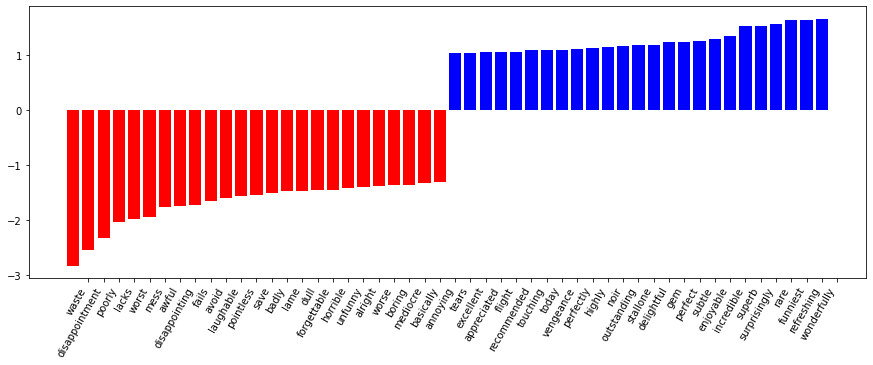

In [61]:
visualize_coefficients(clf,cv.get_feature_names())

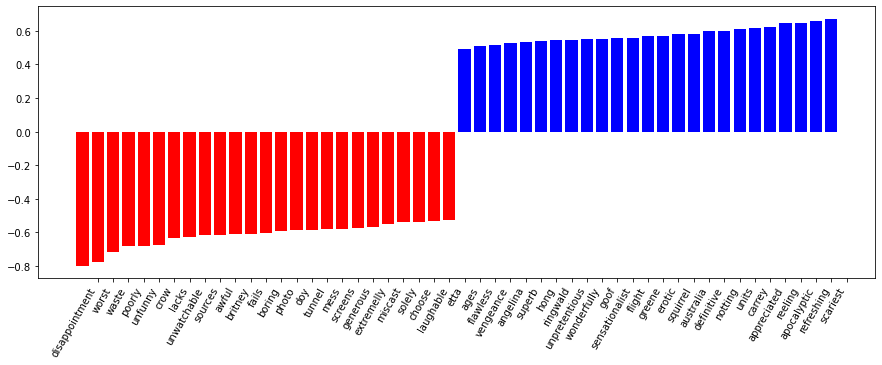

In [62]:
visualize_coefficients(svm,cv.get_feature_names())

In [74]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(
    CountVectorizer(), LogisticRegression(n_jobs=-1, random_state=7)
)

text_pipe_logit.fit(text_train, y_train)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [68]:
param_grid_logit = {"logisticregression__C": np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1,scoring='roc_auc')

grid_logit.fit(text_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             scoring='roc_auc')

In [93]:
grid_logit.best_params_

{'logisticregression__C': 0.1}

In [75]:
text_pipe_svm = make_pipeline(CountVectorizer(), LinearSVC(random_state=7))

text_pipe_svm.fit(text_train, y_train)
param_grid_svm = {"linearsvc__C": np.logspace(-5, 0, 6)}
grid_svm = GridSearchCV(text_pipe_svm, param_grid_svm, cv=3, n_jobs=-1,scoring='roc_auc')

grid_svm.fit(text_train, y_train);
grid_svm.best_params_, grid_svm.best_score_

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


({'linearsvc__C': 0.01}, 0.9469550746223151)

In [72]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score

In [77]:
X_test

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3339346 stored elements in Compressed Sparse Row format>

In [78]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [107]:
sgd_glm=SGDClassifier(random_state=17, n_jobs=-1)

In [95]:
clf=glm(C=0.1,random_state=17,n_jobs=-1,solver='lbfgs')

In [96]:
%%time
clf.fit(X_train,y_train)

Wall time: 9.09 s


LogisticRegression(C=0.1, n_jobs=-1, random_state=17)

In [109]:
%%time
sgd_glm.fit(X_train,y_train)

Wall time: 4.06 s


SGDClassifier(n_jobs=-1, random_state=17)

In [97]:
accuracy_score(y_test,clf.predict(X_test))

0.87812

In [110]:
accuracy_score(y_test,sgd_glm.predict(X_test))

0.88852

In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [113]:
pip install vowpalwabbit

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\user\appdata\local\programs\python\python38-32\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-6yd2gk1l\\vowpalwabbit_a86e7d577fcd4ab69e5549b260157b63\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-6yd2gk1l\\vowpalwabbit_a86e7d577fcd4ab69e5549b260157b63\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\User\AppData\Local\Temp\pip-record-5evtgpcd\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\user\appdata\local\programs\python\python38-32\Include\vowpalwabbit'
         cwd: C:\Users\User\AppData\Local\Temp


Using legacy 'setup.py install' for vowpalwabbit, since package 'wheel' is not installed.
    Running setup.py install for vowpalwabbit: started
    Running setup.py install for vowpalwabbit: finished with status 'error'


In [119]:
data_demo=pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/weights_heights.csv',sep=',')

In [120]:
data_demo

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [122]:
from sklearn.base import BaseEstimator

In [177]:
from sklearn.metrics import mean_squared_error

In [260]:
class SGDRegressor(BaseEstimator):
    def __init__ (self, eta=10**(-3), n_iter_=10, mse_=[], weights_=[]):
        self.mse_ = mse_
        self.weights_ = weights_
        self.eta= eta
        self.n_iter_ = n_iter_
        
    def fit(self, X, y):
        X = self._prepend_ones(X)
        current_w = np.zeros(X.shape[1], dtype=np.float64, order="C")
        
        for i in range(self.n_iter_):
            current_mse, current_w = self._run_iteration(X, y, current_w)
            self.mse_.append(current_mse)
            self.weights_.append(current_w)
        
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
    
    def predict(self, X):
        if self.w_ is None:
            raise Exception('You must fit the model first')

        X = self._prepend_ones(X)        
            
        return self._predict(X, self.w_)
    
    def _run_iteration(self, X, y_true, current_w):
        for i, row in enumerate(X):
            current_w = self._calculate_w(row, y_true[i], current_w)
        
        return mean_squared_error(y_true, self._predict(X, current_w)), current_w
            
    def _calculate_w(self, row, y, previous_w):
        current_w = np.zeros(previous_w.shape, dtype=np.float64, order="C")
        tail = self.eta * (y - row.dot(previous_w)) 
        
        for i, previous_w_i in enumerate(previous_w):
            current_w[i] = previous_w_i + tail * row[i]
            
        return current_w                  
    
    def _prepend_ones(self, X):
        return np.insert(X, 0, np.ones(X.shape[0], dtype=np.float64, order="C"), axis=1)
    
    def _predict(self, X, w):
        y = np.empty(X.shape[0])
        for i, row in enumerate(X):
            y[i] = w.dot(row)
        
        return y

In [172]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [173]:

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [192]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

<IPython.core.display.Javascript object>

In [261]:
clf=SGDRegressor()

In [262]:
clf.fit(X_train_scaled,y_train)

SGDRegressor()

In [274]:
min(clf.mse_)

2.71865292491174

In [275]:
clf.weights_[clf.mse_.index(max(clf.mse_))]

array([68.03792218,  0.91137811])

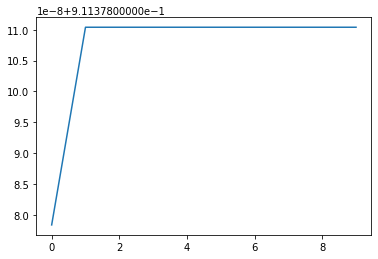

In [286]:
plt.plot(np.array(clf.weights_)[:,1])

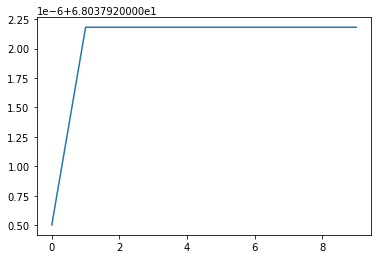

In [287]:
plt.plot(np.array(clf.weights_)[:,0])

In [294]:
clf.fit(X_valid_scaled,y_valid)

SGDRegressor()

In [296]:
min(clf.mse_)

2.670956082262229

In [300]:
clf=lm()

In [302]:
clf.fit(X_train_scaled, y_train)

LinearRegression()

In [308]:
mean_squared_error(clf.predict(X_train_scaled),y_train)

2.7151341434840437

In [309]:
from sklearn.linear_model import SGDClassifier

In [310]:
from sklearn.datasets import load_breast_cancer

In [312]:
cancer = load_breast_cancer()
X, y = cancer.data, [-1 if i == 0 else 1 for i in cancer.target]

In [313]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [314]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

<IPython.core.display.Javascript object>

In [315]:
clf=SGDClassifier(alpha=1,eta0=10**(-3),max_iter=3)

In [316]:
clf.fit(X_train_scaled,y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(alpha=1, eta0=0.001, max_iter=3)

In [325]:
pd.DataFrame(abs(clf.coef_.ravel()),cancer.feature_names).sort_values(by=0)

,0
symmetry error,0.004865
compactness error,0.006079
smoothness error,0.013280
concavity error,0.019611
texture error,0.020248
concave points error,0.025994
mean smoothness,0.033170
mean symmetry,0.039054
mean compactness,0.040837
worst fractal dimension,0.045180


In [322]:
clf.coef_

array([[-0.09933225, -0.08200772, -0.09878357, -0.09392566, -0.0331701 ,
        -0.040837  , -0.08289662, -0.11103015, -0.03905411,  0.04537592,
        -0.07614737,  0.02024813, -0.06855893, -0.06297378,  0.01328021,
         0.00607938,  0.019611  , -0.02599431,  0.00486455,  0.05911043,
        -0.12216385, -0.10590825, -0.11840141, -0.10775305, -0.0910786 ,
        -0.08331994, -0.10169221, -0.13090483, -0.11051855, -0.04517977]])